# Correlation functions

This file plots the correlation functions and calculates the fitted data.

In [1]:
# Reading the data
results <- read.csv(file = "..\\data\\results.csv", sep = ",", header = TRUE)

,index,d,size,x,y,t,temp,comptype,comptime,action,action_error,energy_data,difference_data,correlation_data,correlation_length12,correlation_length23,correlation_length13
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
61,60,3,157464,54,54,54,0.079432,Metropolis Simulation (1000000),8092.149,78732.54,NA,false,false,true,NaN,0.1046504,NaN


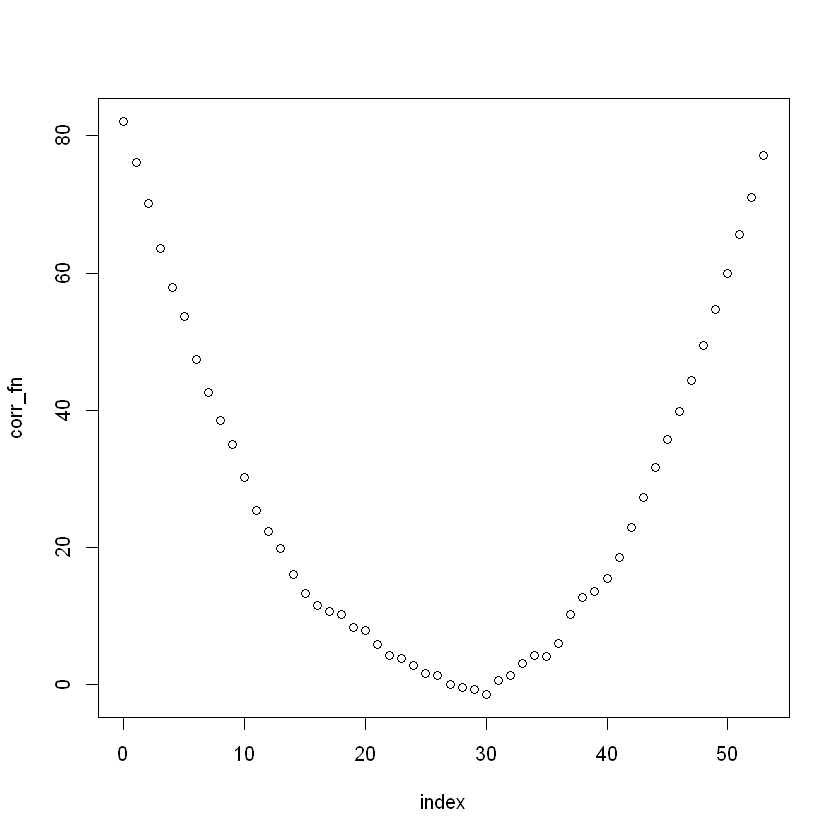

In [2]:
# Plotting a given index
index <- 60
results[results$index == index, ]
d <- read.csv(file = paste("..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), sep = ",", header = FALSE)
colnames(d) <- c("corr_fn")
d$index <- 0:(nrow(d) - 1)
d$corr_fn <- d$corr_fn[nrow(d)/2 + 1] - d$corr_fn

plot(corr_fn ~ index, data = d)

## Fitting the data

We fit the data using the nonlinear least squares method.

In [17]:
# Defining the data
N <- length(d$corr_fn)
x <- 0:(N - 1)
y <- d$corr_fn

# Defining starting values for the fit
m <- 0.1
A <- 10
params <- matrix(c(m, A))

In [26]:
# Calculating the Jacobian
J_m <- params[2] * sinh(params[1] * (x - N / 2)) * (x - N / 2)
J_A <- cosh(params[1] * (x - N / 2)) - 1
J <- matrix(append(J_m, J_A), ncol = 2)

# Calculating the residues
y_prime <- params[2] * (cosh(params[1] * (x - N / 2)) - 1)
r <- y - y_prime

# Calculate the iteration of the parameters
params <- matlib::inv(t(J) %*% J) %*% t(J) %*% r


In [27]:
params

0
0
